# Proyek Analisis Data: [Bike-sharing-Dataset]
- **Nama:** [Evan Austin]
- **Email:** [mc185d5y0640@student.devacademy.id]
- **ID Dicoding:** [mc185d5y0640]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna terdaftar (registered) pada hari kerja selama bulan Januari 2011?

- Apakah terdapat hubungan antara kecepatan angin (windspeed) dan jumlah total pengguna (cnt) pada akhir pekan selama minggu pertama Januari 2011?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [95]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/evanaustin00/bike-sharing-dataset/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [96]:
day_df = pd.read_csv("https://raw.githubusercontent.com/evanaustin00/bike-sharing-dataset/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Dataset yang digunakan terdiri dari dua file:
- hour.csv: Berisi data peminjaman sepeda per jam.
- day.csv: Berisi data peminjaman sepeda per hari.
- Dataset ini kemungkinan besar dikumpulkan oleh penyedia layanan peminjaman sepeda untuk keperluan analisis dan pengambilan keputusan
- Data dikumpulkan dalam format CSV, yang mudah dibaca dan diolah menggunakan tools seperti Python (Pandas) atau R.

### Assessing Data

In [97]:

day_df.info()
hour_df.info()


print("Missing values in day_df:\n", day_df.isna().sum())
print("Missing values in hour_df:\n", hour_df.isna().sum())


print("Jumlah duplikasi di day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi di hour_df: ", hour_df.duplicated().sum())


print(day_df.describe())
print(hour_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

### Cleaning Data

#### Hour data

In [98]:

day_df['dteday'] = pd.to_datetime(day_df['dteday'])


day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)


print(day_df.info())
print(hour_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

**Pertanyaan 1**
Pengaruh Kondisi Cuaca Terhadap Jumlah Pengguna Terdaftar

In [99]:
#Filter data untuk hari kerja di bulan Januari 2011
workingday_jan_2011 = day_df[(day_df['mnth'] == 1) & (day_df['yr'] == 0) & (day_df['workingday'] == 1)]

# Agregasi jumlah pengguna terdaftar berdasarkan kondisi cuaca
weather_impact = workingday_jan_2011.groupby('weathersit')['registered'].sum().reset_index()

**Pertanyaan 2:**
Hubungan Antara Kecepatan Angin dan Jumlah Total Pengguna

In [100]:
# Filter data untuk akhir pekan di minggu pertama Januari 2011
weekend_first_week_jan_2011 = hour_df[(hour_df['dteday'] <= '2011-01-07') & (hour_df['weekday'].isin([0, 6]))]

## Visualization & Explanatory Analysis

Bar plot untuk perbandingan total jumlah pengguna terdaftar

C:\Users\evan austin\AppData\Local\Temp\ipykernel_35784\4190026168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='registered', data=weather_impact, palette='viridis')


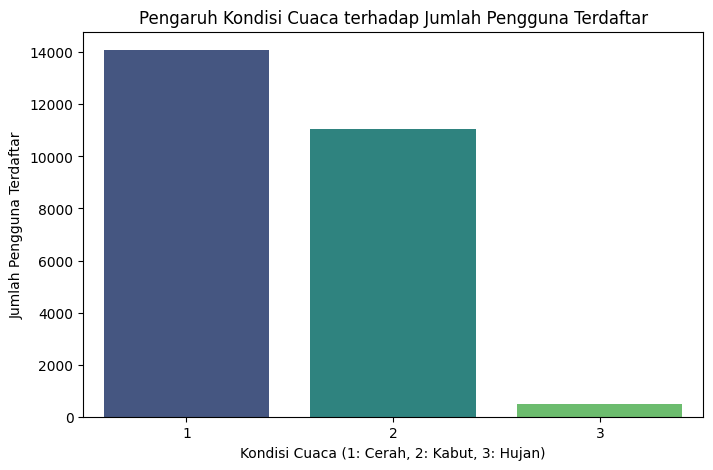

In [101]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='registered', data=weather_impact, palette='viridis')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Terdaftar')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Kabut, 3: Hujan)')
plt.ylabel('Jumlah Pengguna Terdaftar')
plt.show()

Scatter plot untuk hubungan antara kecepatan angin dan jumlah total pengguna

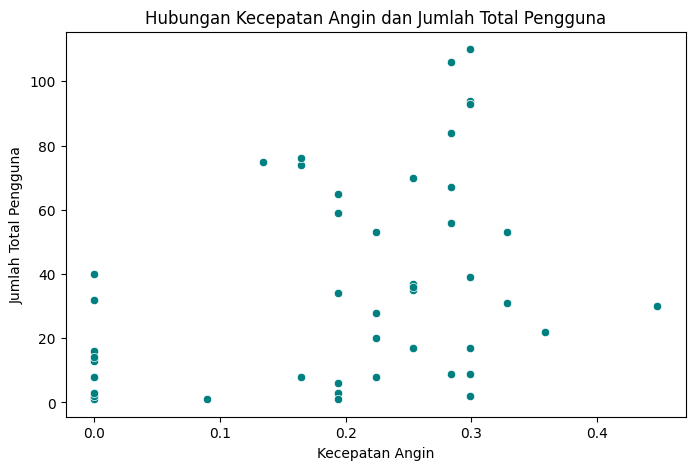

In [102]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='windspeed', y='cnt', data=weekend_first_week_jan_2011, color='teal')
plt.title('Hubungan Kecepatan Angin dan Jumlah Total Pengguna')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Total Pengguna')
plt.show()

## Analisis lanjutan

Tren Penggunaan Sepeda Bulanan
### Agregasi Data: Jumlah total pengguna sepeda per bulan

In [111]:
monthly_usage = day_df.groupby('mnth')['cnt'].sum().reset_index()

print("\nAgregasi Data: Jumlah Total Pengguna Sepeda Per Bulan:\n", monthly_usage)


Agregasi Data: Jumlah Total Pengguna Sepeda Per Bulan:
     mnth     cnt
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


Visualisasi: Line plot untuk tren penggunaan sepeda bulanan

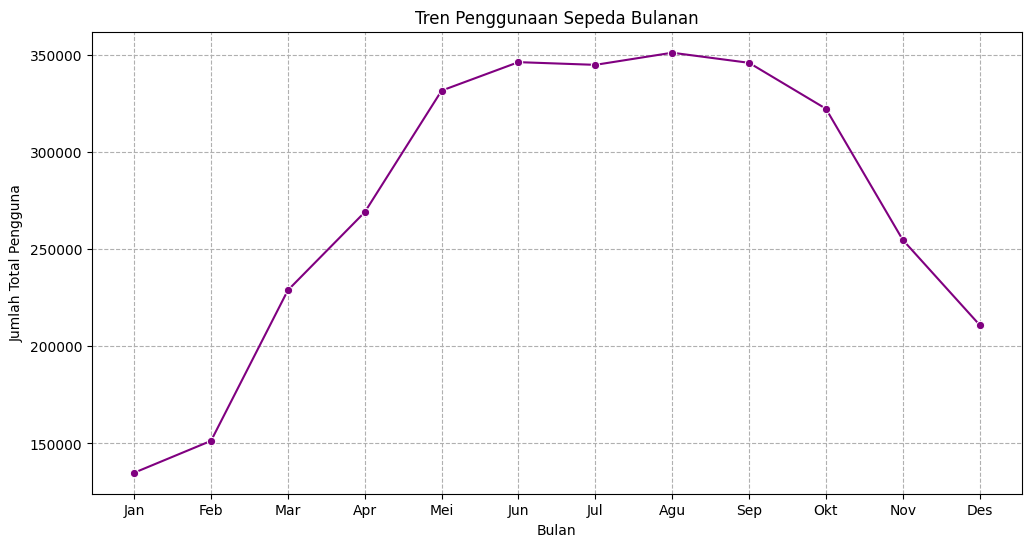

In [110]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=monthly_usage, marker='o', color='purple')
plt.title('Tren Penggunaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Total Pengguna')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True, linestyle='--')
plt.show()

Pengaruh Hari Libur Terhadap Penggunaan Sepeda
### Agregasi Data: Jumlah total pengguna sepeda pada hari libur dan bukan hari libur

In [109]:
holiday_usage = day_df.groupby('holiday')['cnt'].sum().reset_index()
holiday_usage['holiday'] = holiday_usage['holiday'].replace({0: 'Bukan Hari Libur', 1: 'Hari Libur'})

print("\nAgregasi Data: Jumlah Total Pengguna Sepeda Pada Hari Libur dan Bukan Hari Libur:\n", holiday_usage)


Agregasi Data: Jumlah Total Pengguna Sepeda Pada Hari Libur dan Bukan Hari Libur:
             holiday      cnt
0  Bukan Hari Libur  3214244
1        Hari Libur    78435


Visualisasi: Bar plot untuk perbandingan penggunaan sepeda pada hari libur dan bukan hari libur

C:\Users\evan austin\AppData\Local\Temp\ipykernel_35784\1654634274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=holiday_usage, palette='viridis')


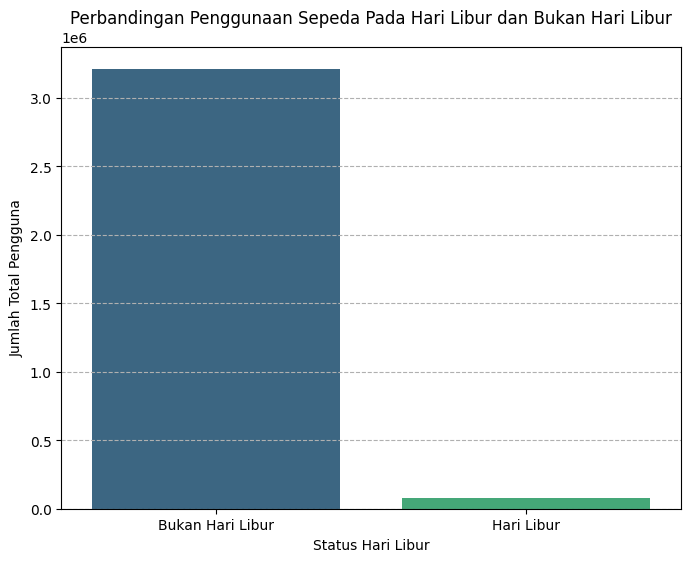

In [108]:
plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='cnt', data=holiday_usage, palette='viridis')
plt.title('Perbandingan Penggunaan Sepeda Pada Hari Libur dan Bukan Hari Libur')
plt.xlabel('Status Hari Libur')
plt.ylabel('Jumlah Total Pengguna')
plt.grid(axis='y', linestyle='--')
plt.show()

Clustering dengan Binning
Mengelompokkan jumlah pengguna berdasarkan kategori tertentu.

C:\Users\evan austin\AppData\Local\Temp\ipykernel_35784\3847815467.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hour_df, x='User_Category', palette='pastel')


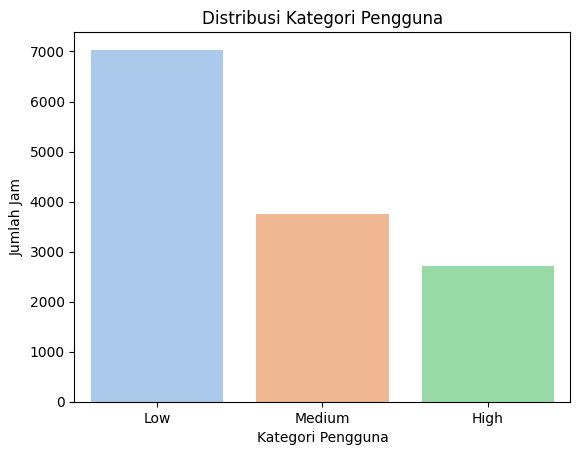

In [112]:
# Binning jumlah total pengguna ke dalam kategori
hour_df['User_Category'] = pd.cut(hour_df['cnt'], bins=[0, 100, 200, 300], labels=['Low', 'Medium', 'High'])

# Visualisasi distribusi kategori pengguna
sns.countplot(data=hour_df, x='User_Category', palette='pastel')
plt.title('Distribusi Kategori Pengguna')
plt.xlabel('Kategori Pengguna')
plt.ylabel('Jumlah Jam')
plt.show()


## Conclusion